# Dogs Vs Cats

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import zipfile
import random

## EDA

In [3]:
local_dir='./train.zip'
os.mkdir('trainData')
print('Dir created successfully!')

Dir created successfully!


In [5]:
zip_ref=zipfile.ZipFile(local_dir,'r')
zip_ref.extractall('./trainData')
print('Data Extracted Successfully!')
zip_ref.close()

Data Extracted Successfully!


In [2]:
train_dir='./trainData/train'
train_img_names=os.listdir(train_dir)
train_img_names[0:5]

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']

In [3]:
print(f'Total number of training images : {len(train_img_names)}')

Total number of training images : 25000


In [4]:
categories=list()

for img in train_img_names:
    category=img.split('.')[0]
    
    if category=='dog':
        categories.append('dog')
    else:
        categories.append('cat')
        
df=pd.DataFrame({"Image":train_img_names,"Category":categories})

In [5]:
df.head()

,Image,Category
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


In [6]:
df.shape

(25000, 2)

<AxesSubplot:xlabel='Category', ylabel='count'>

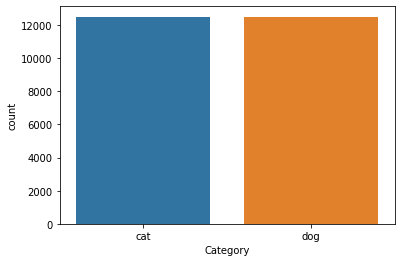

In [7]:
sns.countplot(data=df,x='Category')

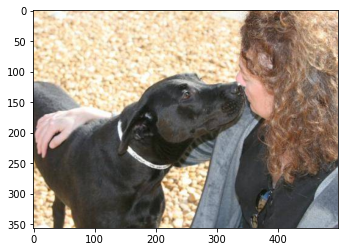

In [18]:
sample=random.choice(train_img_names)
plt.imshow(plt.imread(train_dir+'/'+sample))

## Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

train,validation=train_test_split(df,test_size=0.2)
train=train.reset_index(drop=True)
validation=validation.reset_index(drop=True)

In [28]:
train

,Image,Category
0,dog.11760.jpg,dog
1,cat.4692.jpg,cat
2,cat.1674.jpg,cat
3,cat.11360.jpg,cat
4,cat.7865.jpg,cat
...,...,...
19995,cat.3780.jpg,cat
19996,cat.7534.jpg,cat
19997,dog.8978.jpg,dog
19998,cat.5803.jpg,cat


In [29]:
validation

,Image,Category
0,dog.12319.jpg,dog
1,dog.8773.jpg,dog
2,cat.4873.jpg,cat
3,cat.11497.jpg,cat
4,dog.5717.jpg,dog
...,...,...
4995,cat.10368.jpg,cat
4996,dog.3897.jpg,dog
4997,cat.11545.jpg,cat
4998,cat.7083.jpg,cat


## Loading Data

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
train_datagen=ImageDataGenerator(rescale=1/255)

In [33]:
train_gen=train_datagen.flow_from_dataframe(train,
                                           directory=train_dir,
                                           x_col="Image",
                                           y_col="Category",
                                           batch_size=20,
                                           class_mode='binary',
                                           target_size=(150,150))

Found 20000 validated image filenames belonging to 2 classes.


In [34]:
validation_datagen=ImageDataGenerator(rescale=1/255)

In [35]:
validation_gen=validation_datagen.flow_from_dataframe(validation,
                                           directory=train_dir,
                                           x_col="Image",
                                           y_col="Category",
                                           batch_size=20,
                                           class_mode='binary',
                                           target_size=(150,150))

Found 5000 validated image filenames belonging to 2 classes.


## Modelling

In [37]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3,activation="relu", input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

In [42]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [64]:
callback=EarlyStopping(monitor="val_loss", patience=4)

In [65]:
history=model.fit(train_gen,validation_data=validation_gen,epochs=15,callbacks=[callback])

Epoch 1/15
1000/1000 [==============================] - 554s 554ms/step - loss: 0.1264 - accuracy: 0.9508 - val_loss: 0.6287 - val_accuracy: 0.7990
Epoch 2/15
1000/1000 [==============================] - 545s 545ms/step - loss: 0.0889 - accuracy: 0.9671 - val_loss: 0.7354 - val_accuracy: 0.7930
Epoch 3/15
1000/1000 [==============================] - 542s 542ms/step - loss: 0.0699 - accuracy: 0.9762 - val_loss: 0.7635 - val_accuracy: 0.8066
Epoch 4/15
1000/1000 [==============================] - 530s 530ms/step - loss: 0.0536 - accuracy: 0.9819 - val_loss: 0.8316 - val_accuracy: 0.8022
Epoch 5/15
1000/1000 [==============================] - 533s 533ms/step - loss: 0.0549 - accuracy: 0.9831 - val_loss: 0.8283 - val_accuracy: 0.8018


<AxesSubplot:>

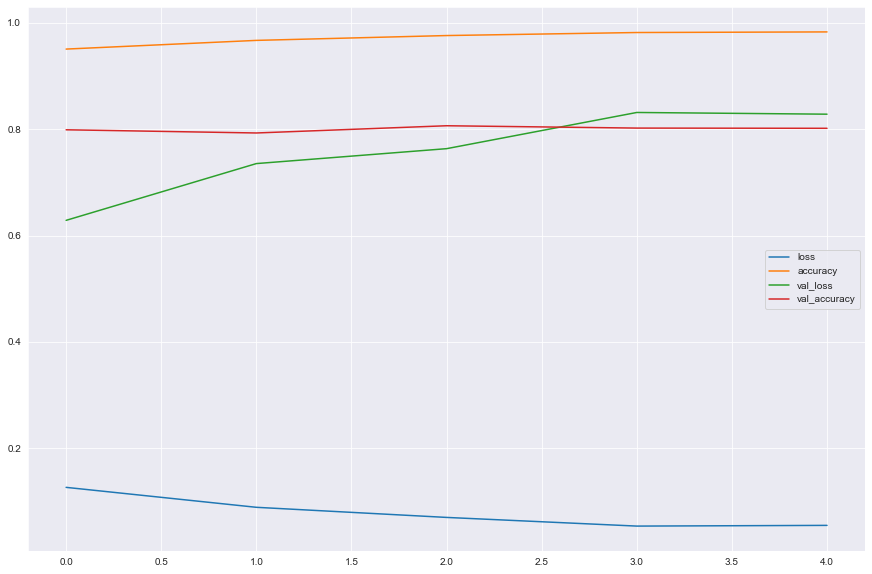

In [66]:
sns.set_style("darkgrid")
pd.DataFrame(model.history.history).plot(figsize=(15,10))

In [67]:
accuracies=np.asarray(model.history.history['accuracy'])
accuracies.max()

0.9830999970436096

In [68]:
print(f'The dog vs cat classifier has an accuracy of {accuracies.max()*100}%')

The dog vs cat classifier has an accuracy of 98.30999970436096%
